In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import os
import tensorflow as tf
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

import findspark
findspark.init()

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#  Import and read the Ghibli_characters.csv
df = pd.read_csv("..\\project4\Resources\StudioGhibliCharacters - Sheet1.csv")
df.head()

,character name,age,height(cm),eyeColor,hairColor,specialPowers,country/placeOfResidence,gender,species,movie,releaseDate
0,Pazu,13.0,120.0,black,brown,0,Laputa,Male,Human,Castle in the Sky,1986
1,Lusheeta Toel Ul Laputa,13.0,120.0,black,black,1,Laputa,Female,Human,Castle in the Sky,1986
2,Dola,60.0,NaN,black,peach,0,Laputa,Female,Human,Castle in the Sky,1986
3,Romka Palo Ul Laputa,33.0,NaN,black,brown,0,Laputa,Male,Human,Castle in the Sky,1986
4,Uncle Pom,NaN,NaN,black,white,0,Laputa,Male,Human,Castle in the Sky,1986


In [3]:
# clean dataframe and drop non-beneficial 
cleanedCharacters = df.drop(columns = ['character name','movie', 'releaseDate', 'country/placeOfResidence','gender'], axis=1)
cleanedCharacters.head(20)

,age,height(cm),eyeColor,hairColor,specialPowers,species
0,13.0,120.0,black,brown,0,Human
1,13.0,120.0,black,black,1,Human
2,60.0,NaN,black,peach,0,Human
3,33.0,NaN,black,brown,0,Human
4,NaN,NaN,black,white,0,Human
5,NaN,NaN,black,bald,0,Human
6,NaN,NaN,dark brown,dark brown,0,Human
7,30.0,NaN,dark brown,dark brown,0,Human
8,NaN,NaN,dark brown,light brown,0,Human
9,NaN,NaN,dark brown,reddish brown,0,Human


In [4]:
# Replace all NaN values wiith 0's to keep features
characters_df = cleanedCharacters.dropna()
characters_df

,age,height(cm),eyeColor,hairColor,specialPowers,species
0,13.0,120.0,black,brown,0,Human
1,13.0,120.0,black,black,1,Human
13,11.0,110.0,dark brown,dark brown,0,Human
14,4.0,100.0,brown,light brown,0,Human
19,1302.0,215.0,grey,grey,1,Totoro
23,13.0,130.0,black,brown,1,Witch
24,13.0,20.0,black,black,1,Cat
25,18.0,170.0,black,red,1,Witch
47,17.0,160.0,brown,red,0,Human
58,14.0,120.0,black,light black,0,Human


In [5]:
characters_df.shape

(38, 6)

In [6]:
# Scale price data, return, and variance values
data_scaled = StandardScaler().fit_transform(
    characters_df[["age","height(cm)"]]
)

In [7]:
# Create a DataFrame with the scaled data
df_data_scaled = pd.DataFrame(
    data_scaled,
    columns=[["age","height(cm)"]]
)

# Display sample data
df_data_scaled.head()

,age,height(cm)
0,-0.357054,-0.072889
1,-0.357054,-0.072889
2,-0.365388,-0.251584
3,-0.394558,-0.430280
4,5.014329,1.624717


In [8]:
# get_dummies to convert categorical values to numerical values
cat_dum = cleanedCharacters.copy()
cat_dum.drop(columns=["age","species","height(cm)"], axis=1, inplace=True)
cat_dum2 = pd.concat([cat_dum, df_data_scaled], axis=1)
ghibli_dummies = pd.get_dummies(cat_dum2)
ghibli_dummies.head()

,specialPowers,"(age,)","(height(cm),)",eyeColor_black,eyeColor_black,eyeColor_blue,eyeColor_brown,eyeColor_brown,eyeColor_dark brown,eyeColor_emerald,...,hairColor_orange yellow,hairColor_peach,hairColor_purple,hairColor_red,hairColor_red,hairColor_reddish brown,hairColor_russian blue,hairColor_white,hairColor_whtie,hairColor_yellow
0,0,-0.357054,-0.072889,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,-0.357054,-0.072889,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,-0.365388,-0.251584,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0,-0.394558,-0.430280,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,5.014329,1.624717,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
# Look at Species types for catergorizing
species_class = df['species']
species_class.head()

0    Human
1    Human
2    Human
3    Human
4    Human
Name: species, dtype: object

In [10]:
# Create All Human species classifications to be replaced with 0
Humans = species_class[(species_class == "Human") | (species_class == "New Human")]

# Replace in dataframe
for species in Humans:
    df['species'] = df['species'].replace(species,"0")

# Check to make sure binning was successful
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
179    0
180    0
181    0
182    0
183    0
Name: species, Length: 184, dtype: object

In [11]:
# Create All other species classifications to be replaced with 1
OtherSpecies = species_class[species_class != "Human"]

# Replace in dataframe
for species in OtherSpecies:
    df['species'] = df['species'].replace(species,"1")

# Check to make sure binning was successful
df['species'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: species, dtype: object

In [12]:
# split data into features and target arrays
y = df['species'].astype('float64')
X = ghibli_dummies.values

In [13]:
# show first 3 X values
X[:3]

array([[0, -0.3570540691776222, -0.07288889680543577, True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [1, -0.3570540691776222, -0.07288889680543577, True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [0, -0.36538825506751754, -0.25158425671553625, True, False,
        False, F

In [14]:
# show 20 y values
y[:20]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
Name: species, dtype: float64

In [15]:
# split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (138, 54)
Training Data Labels Shape: (138,)


In [16]:
# Create Standard Scaler
scaler = StandardScaler()

# Fit scaler to training data
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation='relu', input_dim=54))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 275       
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 576 (2.25 KB)
Trainable params: 576 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=72)

Epoch 1/72
5/5 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6884
Epoch 2/72
5/5 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7174
Epoch 3/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 4/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 5/72
5/5 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7174
Epoch 6/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 7/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 8/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 9/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 10/72
5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7174
Epoch 11/72
5/5 [==============================] - 0s 3ms/step - loss

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: nan - accuracy: 0.7826 - 120ms/epoch - 60ms/step
Loss: nan, Accuracy: 0.782608687877655


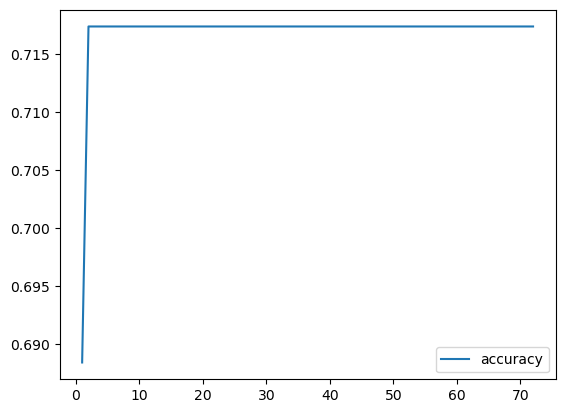

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()